# MODULES


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()


___

# FROM SAMPLE TO POPULATION

## Sampling Distribution of Sample Statistics

The true value of a population's parameter is usually unknown; we try to estimate it based on the available sample data. But how does the sample statistics relate to the actual population parameter ?

As covered ealier:
+ the true value of a population's parameter is fixed.
+ a sample is only part of the population; the numerical value of its statistic will not be the exact value of the parameter.
+ the observed value of the statistic depends on the selected sample.
+ some variability in the values of a statistic, over different samples, is unavoidable.

As it depends on the sample, the sample statistic is random and has a **sampling distribution** we can study. 


## Central Limit Theorem

Let ${X_{1},\ldots ,X_{n}}$ be a sequence of independent and identically distributed (i.i.d.) random variables drawn from a distribution of expected value $\mu$ and finite variance $\sigma^2$. Let ${\bar {X}}_{n}$ be the sample average: ${\bar {X}}_{n} = ({X_{1} + \ldots + X_{n}}) / n$.

### Law of Large Numbers (LLN)

The [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) states that the sample mean converges to $\mu$ as the sample size increases.


### Central Limit Theorem (CLT)

The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that during this convergence, the difference between the sample mean and its limit $\mu$ approximates the normal distribution with mean 0 and variance $\sigma ^{2}/n$. A very important property of the CLT is that it holds regardless of the distribution of $X_i$.

This means that for large samples (typically $n$ greater than 30), the sampling distribution of the sample mean is approximately normal and has the following paramaters:

+ mean: $\mu$
+ standard error: $\sigma / \sqrt{n}$

The **standard error** is the **standard deviation** of the **sampling distribution** of the sample mean.

### Example for the Exponential distribution

![missing](../../img/exp-clt.png)

## Confidence Interval

As shown in the example, the sample means can take a large range of values, some being quite far from the actual population mean. We usually have only one sample to study the population, with no way of knowing where our sample mean sits in the sampling distribution. What we can do is leverage the CLT to quantify this uncertainty and build a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the population mean. 

Given a confidence percentage $1 - \alpha$, we can calculate the interval of values inside which $1 - \alpha$ percent of all samples means will fall. A small percentage $\alpha$ of all samples, the ones least representative of the population, will have a sample mean so far from the actual mean that it falls outside of this interval. 

Leveraging the fact that the sampling distribution of the sample mean is roughly normal, our sample mean has a 95% probability of being between -2 and +2 standard errors of the population mean $\mu$:

<img class="center-block" src="https://sebastienplat.s3.amazonaws.com/9ec352c1ff3263bdd17c8407d30c1f0b1490007929308"/>


Mathematically, this translates to:

$P(\bar{y} \in [\space\mu \pm 2 se\space] ) = P(\bar{y} \in [\space\mu \pm 2 \sigma/\sqrt{n}\space] ) \simeq 0.95$

We can deduce that:

$P(\mu \in [\space\bar{y} \pm 2 \sigma/\sqrt{n}\space] ) \simeq 0.95$

In other words: for 95% of all the samples, the population mean will fall between two standard errors from the sample mean. For 5% of all the samples, the population mean will not be inside that confidence interval and our inference will be incorrect.

_Note: we have no way of knowing if our sample is part of these 5%. This is why $\alpha$ is called the Type I Error._


___

# T-DISTRIBUTION
## Limits of the CLT

The CLT Confidence intervals **do not works** when either:

+ $\sigma$ is unknown.
+ the sample size $n$ is small.

The [Student’s t distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) is used instead. 


## Assumptions of the t-distribution

The sampling distribution of the sample mean has to be roughly normal for the t-distribution to work well. It means that either:

+ the population is normally distributed, even for small samples.
+ the sample is large, regardless of the underlying distribution of data, thanks to the CLT.

If the sample size is very small, we can use normal probability plots to check whether the sample may come from a normal distribution. 


## Properties of the t-distribution

Small samples are more likely to underestimate $\sigma$ and have a mean that differs from $\mu$. The t-distribution accounts for this uncertainty with heavier tails compared to a Gaussian: the probability of extreme values becomes comparatively higher. This means its confidence intervals are wider than CLT ones for the same confidence level.

We have seen that under the assumptions of the CLT:

$$\frac { \bar {X_n} - \mu }{\sigma /\sqrt {n}} \sim N(0, 1)$$

Under the assumptions of the t-distribution, we can substitute the unbiased sample variance $\widehat {\sigma}^2$ to the sampling distribution of the sample mean  ([mathematical proof](https://www.math.arizona.edu/~jwatkins/ttest.pdf)):

$$\frac { \bar {X_n} - \mu }{\widehat {\sigma} /\sqrt {n}} \sim t_{n-1}$$

The distribution $t_{n-1}$ is the t-distribution with $n-1$ degrees of freedom.

_Note: the unbiased variance calculated from a sample of size $n$ uses $n-1$ to average the distances from the mean, in what is called the [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction), to [reduce the bias](https://dawenl.github.io/files/mle_biased.pdf)._

_Note: When the sample size is large (30+ observations), the Student Distribution becomes extremely close to the normal distribution._


## Confidence intervals

The $1 - \alpha$ T Confidence Interval is:

$$\bar{y} \pm T_{\alpha/2, n-1} \times \widehat {\sigma}^2 / \sqrt{n}$$

Where $T_{\alpha/2, n-1}$ is the distance from the mean of the t-distribution with n-1 degrees of freedom above which lay $\alpha/2$ percent of all observations



## Example for the Exponential distribution

Back to the Exponential Distribution, the figure below shows the experimental sample mean distribution vs T vs Normal for different sample sizes: 2, 5, 10 and 20:
+ the t-distribution gets close to normal even for relatively small sample sizes. 
+ it does not approximate the empirical distribution very well for smaller sample sizes because its assumptions are not met: the exponential distribution is far from normal.

<img class="center-block" src="https://sebastienplat.s3.amazonaws.com/dc954f3e9562d53b7829a2adcd2854ff1490011103173"/>


___

# TESTING FOR NORMALITY
## Q-Q Plots

### Construction

Q–Q (quantile-quantile) plots compare two probability distributions by plotting their quantiles against each other. They are commonly used to compare a dataset to a theoretical model, providing a graphical assessment of "goodness of fit" rather than a numerical summary.

_Note: When the two datasets have the same size, the Q_Q plot orders each set in increasing order and pairs off the corresponding values. Otherwise, it is necessary to interpolate quantile estimates for the smallest dataset._

_Note: in an ordered sample, the kth-smallest value is called its [kth-order statistic](https://en.wikipedia.org/wiki/Order_statistic). For the normal distribution, tje order statistics are called [rankits](https://en.wikipedia.org/wiki/Rankit)._


### Interpretation

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line y = x.

A non-linear pattern suggests the two datasets don't have the same probability distribution.


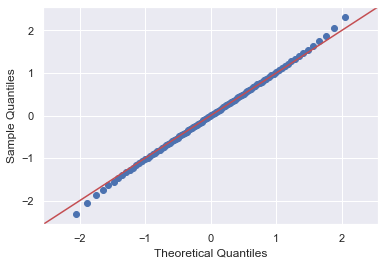

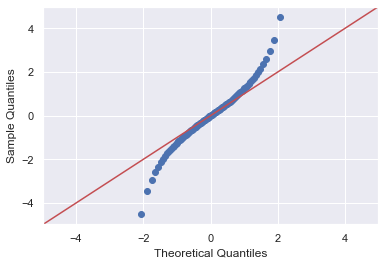

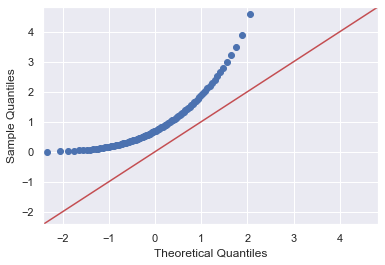

In [52]:
import numpy as np
import statsmodels.api as sm

np.random.seed(42)

test = stats.norm.ppf(np.linspace(0, 1, 100), 0, 1)
_ = sm.qqplot(test, line='45')

test = stats.t.ppf(np.linspace(0, 1, 100), 3)
_ = sm.qqplot(test, line='45')

test = stats.expon.ppf(np.linspace(0, 1, 100))
_ = sm.qqplot(test, line='45')


In [36]:
test

array([0.00443185, 0.00791545, 0.01358297, 0.02239453, 0.03547459,
       0.05399097, 0.07895016, 0.11092083, 0.14972747, 0.19418605,
       0.24197072, 0.28969155, 0.3332246 , 0.36827014, 0.39104269,
       0.39894228, 0.39104269, 0.36827014, 0.3332246 , 0.28969155,
       0.24197072, 0.19418605, 0.14972747, 0.11092083, 0.07895016,
       0.05399097, 0.03547459, 0.02239453, 0.01358297, 0.00791545,
       0.00443185])

In [44]:
test

array([       -inf, -2.32257453, -2.04959427, -1.87635856, -1.74601652,
       -1.63997627, -1.5497059 , -1.47054524, -1.39965665, -1.33517774,
       -1.27581704, -1.22064035, -1.16894884, -1.12020535, -1.0739875 ,
       -1.02995676, -0.98783733, -0.94740127, -0.90845787, -0.87084575,
       -0.83442701, -0.79908276, -0.76470967, -0.73121725, -0.69852571,
       -0.66656426, -0.63526971, -0.60458535, -0.57445999, -0.54484724,
       -0.51570479, -0.48699394, -0.45867907, -0.4307273 , -0.40310812,
       -0.37579311, -0.3487557 , -0.32197089, -0.29541514, -0.26906614,
       -0.24290266, -0.21690443, -0.19105201, -0.16532667, -0.1397103 ,
       -0.11418529, -0.08873448, -0.06334102, -0.03798835, -0.01266008,
        0.01266008,  0.03798835,  0.06334102,  0.08873448,  0.11418529,
        0.1397103 ,  0.16532667,  0.19105201,  0.21690443,  0.24290266,
        0.26906614,  0.29541514,  0.32197089,  0.3487557 ,  0.37579311,
        0.40310812,  0.4307273 ,  0.45867907,  0.48699394,  0.51

In [38]:
test

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

## Jarque-Bera Test

## Shapiro-Wilk Test